<a href="https://colab.research.google.com/github/Srinithimahalakshmi/Data_science/blob/main/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


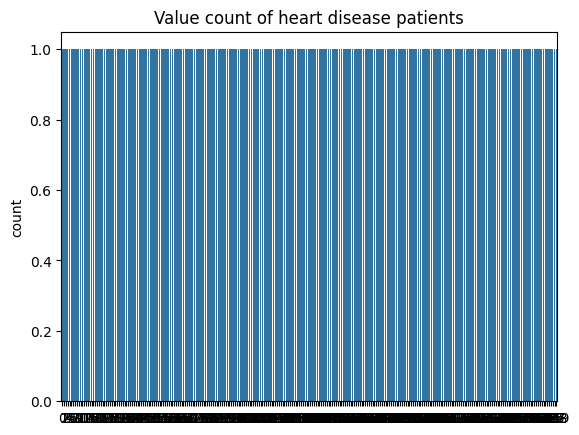

In [3]:
df=pd.read_csv('/content/heart_v2 (1).csv')
print(df.head())
sns.countplot(df['heart disease'])
plt.title('Value count of heart disease patients')
plt.show()

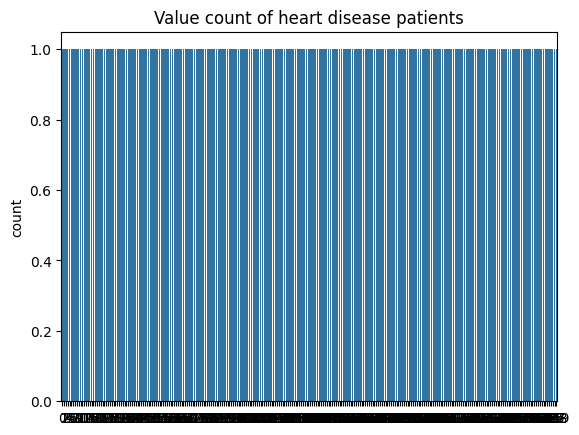

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['heart disease'])
plt.title('Value count of heart disease patients')
plt.show()

In [5]:
x=df.drop('heart disease',axis=1)
y=df['heart disease']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=42)
x_train.shape,x_test.shape

((81, 4), (189, 4))

In [7]:
import time
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)
start_time=time.time()
classifier_rf.fit(x_train,y_train)
end_time=time.time()
print(f"Training completed in {end_time - start_time:.4f} seconds")

Training completed in 0.5570 seconds


In [8]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=classifier_rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[76 33]
 [27 53]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       109
           1       0.62      0.66      0.64        80

    accuracy                           0.68       189
   macro avg       0.68      0.68      0.68       189
weighted avg       0.69      0.68      0.68       189



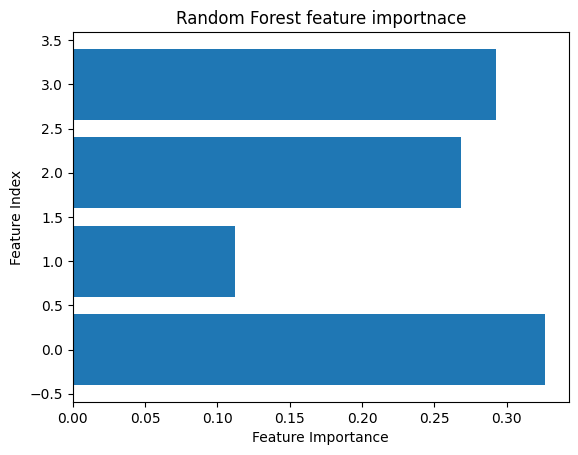

In [9]:
import matplotlib.pyplot as plt
importances=classifier_rf.feature_importances_
plt.barh(range(len(importances)),importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Random Forest feature importnace')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid={
    'n_estimators':[100,200],'max_depth':[None,10,20]

}

In [14]:
model=RandomForestRegressor()

In [15]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]})

In [19]:
print("Best Cv score:",grid_search.best_score_)


Best Cv score: -0.19687478613764572


In [25]:
rf_best=grid_search.best_estimator_
rf_best


RandomForestRegressor(max_depth=10)

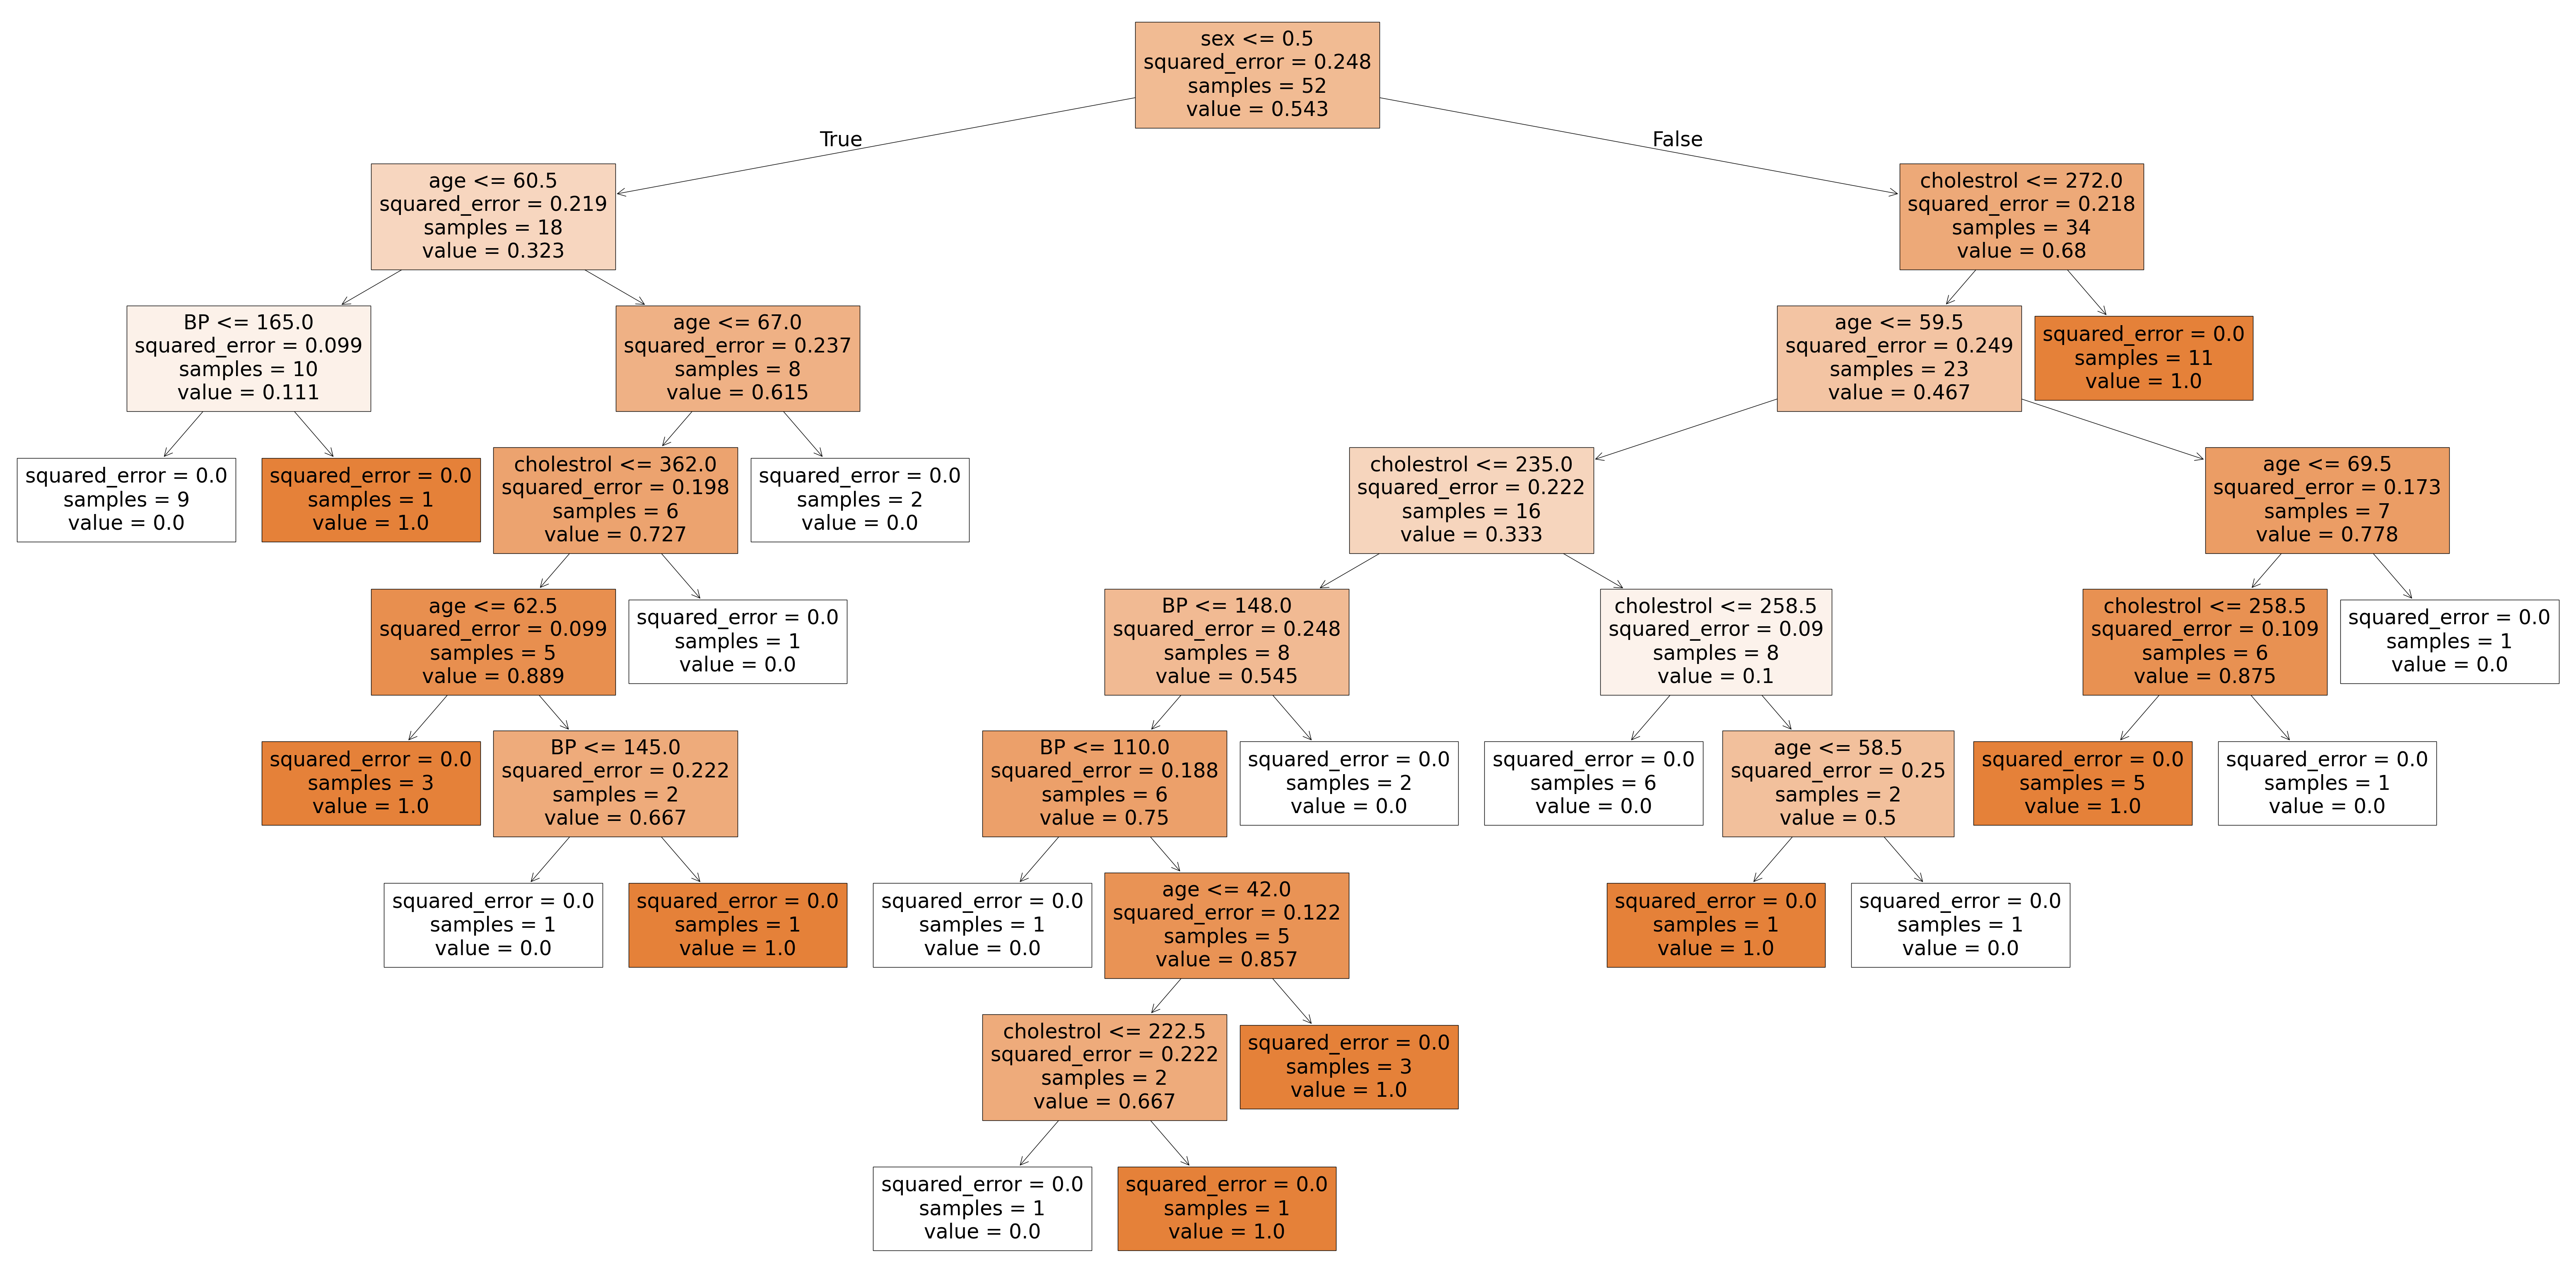

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names=x.columns,class_names=['Disease','No Disease'],filled=True);

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


In [29]:
rf=RandomForestClassifier(random_state=42)
random_param_grid={
    'n_estimators':np.arange(50,201,10),
    'max_depth':[None]+list(np.arange(5,30,5)),'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
    }

In [30]:
random_search=RandomizedSearchCV(estimator=rf,param_distributions=random_param_grid,cv=3,verbose=1,n_jobs=-1,random_state=42)
random_search.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, np.int64(5),
                                                      np.int64(10),
                                                      np.int64(15),
                                                      np.int64(20),
                                                      np.int64(25)],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200])},
                   random_state=42, verbose=1)

In [31]:
print("Best Parameters(Random Search):",random_search.best_params_)
print("Validation_Score:",random_search.best_score_)
y_pred_random=random_search.predict(x_test)
print("Test Accuracy(Random Search):",accuracy_score(y_test,y_pred_random))

Best Parameters(Random Search): {'n_estimators': np.int64(60), 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': np.int64(20)}
Validation_Score: 0.6049382716049383
Test Accuracy(Random Search): 0.6772486772486772
